In [5]:
%%bash

# DIFFERENTIAL EXPRESSION ANALYSIS
source activate R_env

Rscript deseq2_mRNA_analysis.R -c /home/ferrari/ferrari/PhD_project/reference_datasets/FOXG1_project/Foxg1_RNA-Seq_AdultHippo_6w/output_snakepipes/featureCounts/counts.tsv \
-meta metadata_invivoHippo_Foxg1HTvsWT.tsv -d "~ condition" -ref WT -o DESeq2/

[1] "DESeq2/"
[1] FALSE
[1] FALSE
[1] FALSE
[1] "metadata_invivoHippo_Foxg1HTvsWT.tsv"
[1] "/home/ferrari/ferrari/PhD_project/reference_datasets/FOXG1_project/Foxg1_RNA-Seq_AdultHippo_6w/output_snakepipes/featureCounts/counts.tsv"
[1] "X373_PlusPlus_hippoc" "X374_crePlus_hippoc"  "X377_PlusPlus_hippoc"
[4] "X378_crePlus_hippoc" 
[1] "X373_PlusPlus_hippoc" "X374_crePlus_hippoc"  "X377_PlusPlus_hippoc"
[4] "X378_crePlus_hippoc" 
                      X373_PlusPlus_hippoc X374_crePlus_hippoc
ENSMUSG00000000001.4                  2438                1994
ENSMUSG00000000003.15                    0                   0
ENSMUSG00000000028.15                   84                  78
ENSMUSG00000000031.16                    7                  11
ENSMUSG00000000037.16                   47                  44
ENSMUSG00000000049.11                   19                  15
                      X377_PlusPlus_hippoc X378_crePlus_hippoc
ENSMUSG00000000001.4                  1928                1794
EN

Warning message:
package ‘argparse’ was built under R version 3.5.2 
Loading required package: AnnotationDbi


clusterProfiler v3.10.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Attaching package: ‘clusterProfiler’

The following object is masked from ‘package:DelayedArray’:

    simplify

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).
additional priors are available via the 'type' argument, see ?lfcShrink for details
using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib.lines import Line2D
import seaborn as sns
sys.path.append("/home/ferrari/anaconda3/lib/python3.7/site-packages/")
from adjustText import adjust_text
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
res = pd.read_csv("DESeq2/DE_genes_shrinked_apeglm.tsv", sep="\t", header=0)
res.loc[res.padj<0.05]

,baseMean,log2FoldChange,lfcSE,pvalue,padj,symbol
ENSMUSG00000040536.15,7022.730654,1.152378,0.106042,8.103533e-29,1.228820e-24,Necab1
ENSMUSG00000078612.9,98.570232,-2.736111,0.405890,7.576791e-13,5.744723e-09,RP23-431F3.1
ENSMUSG00000036357.5,394.570784,-1.836981,0.284987,4.861657e-12,2.457405e-08,Gpr101
ENSMUSG00000004207.14,32013.600198,0.761802,0.123093,2.740157e-11,1.038793e-07,Psap
ENSMUSG00000032280.16,1105.247602,-0.885894,0.144641,3.884091e-11,1.177967e-07,Tle3
...,...,...,...,...,...,...
ENSMUSG00000051457.7,91.788797,0.975830,0.394933,3.925123e-04,4.461037e-02,Spn
ENSMUSG00000020811.16,5196.572259,0.381669,0.154596,4.146258e-04,4.623077e-02,Wscd1
ENSMUSG00000033491.13,689.315387,0.703750,0.287125,4.130432e-04,4.623077e-02,Prss35
ENSMUSG00000034591.5,1366.828810,0.380354,0.154905,4.302064e-04,4.761788e-02,Slc41a2


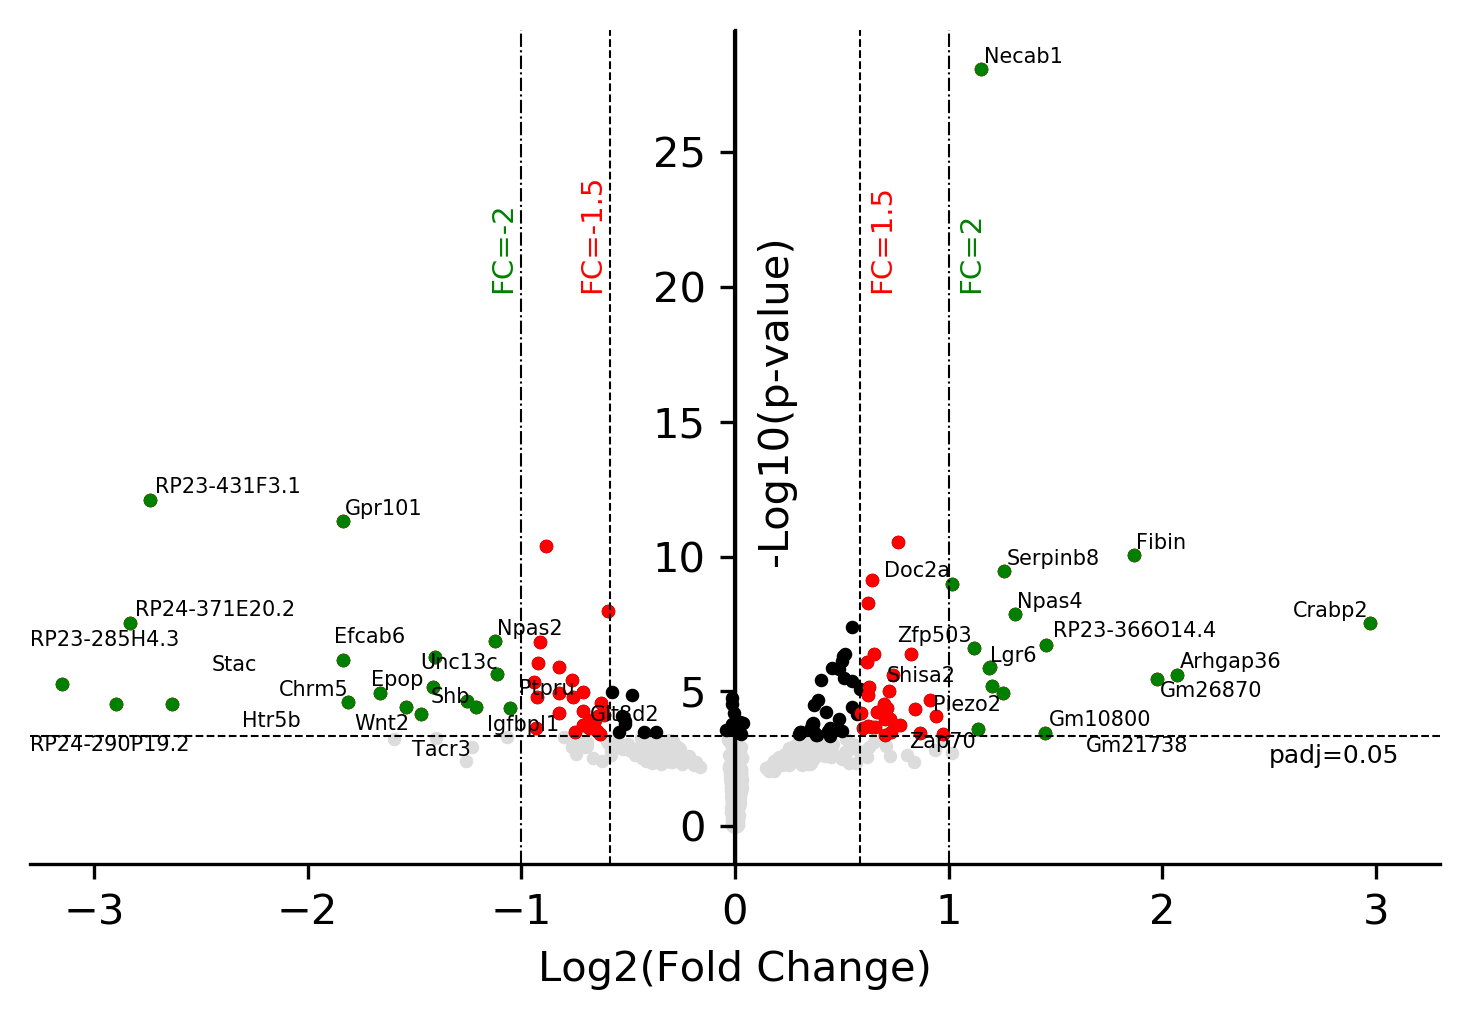

In [11]:
### volcano plot

fig,ax = plt.subplots(dpi=300,figsize=(5,3.5))
y = -np.log10(res["pvalue"])
x = res.log2FoldChange
sigs = res["padj"] < 0.05


ax.scatter(x,y,color="gainsboro",s=5,alpha=1)
ax.scatter(x.loc[sigs],y.loc[sigs],color="k",s=5,alpha=1)
ax.scatter(x.loc[(np.fabs(x) > np.log2(1.5)) & sigs],y.loc[(np.fabs(x) > np.log2(1.5))& sigs],color="r",s=5,alpha=1)
ax.scatter(x.loc[(np.fabs(x) > np.log2(2)) & sigs],y.loc[(np.fabs(x) > np.log2(2)) & sigs],color="g",s=5,alpha=1)
#ax.scatter(x[sig_up],y[sig_up],color="red",s=5)
ax.set_xlabel("Log2(Fold Change)")
ax.set_xlim((-3.3,3.3))
#ax.set_ylabel("-Log10(p-value)", size=4)
ax.annotate("-Log10(p-value)", (0.1,10),rotation=90,size=10)
ax.annotate("FC=1.5", (np.log2(1.5)+0.04,20),rotation=90,color='r',size=7)
ax.annotate("FC=-1.5", (-np.log2(1.5)-0.15,20),rotation=90,color='r',size=7)
ax.annotate("FC=2", (np.log2(2)+0.04,20),rotation=90,color='g',size=7)
ax.annotate("FC=-2", (-np.log2(2)-0.15,20),rotation=90,color='g',size=7)
ax.annotate("padj=0.05", (2.5, -np.log10(4.347163e-04)-1),color='k',size=6)

ax.axvline(0,linewidth=1,color="k")
ax.axvline(np.log2(1.5),linestyle='--',linewidth=0.5,color='k')
ax.axvline(-np.log2(1.5),linestyle="--",linewidth=0.5,color='k')
ax.axvline(np.log2(2),linestyle='-.',linewidth=0.5,color='k')
ax.axvline(-np.log2(2),linestyle="-.",linewidth=0.5,color='k')
ax.axhline(-np.log10(4.347163e-04),linestyle="--",linewidth=0.5, color="k")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['left'].set_position('center')


idx = res.loc[(res.log2FoldChange>1)&sigs].index
idx2 = res.loc[(res.log2FoldChange<-1)&sigs].index
texts = [plt.text(res["log2FoldChange"].loc[idx].values[i], -np.log10(res["pvalue"]).loc[idx].values[i], res["symbol"].loc[idx].values[i], ha='center', va='center',  fontsize=5) for i in range(len(idx))]
texts2 = [plt.text(res["log2FoldChange"].loc[idx2].values[i], -np.log10(res["pvalue"]).loc[idx2].values[i], res["symbol"].loc[idx2].values[i], ha='center', va='center',  fontsize=5) for i in range(len(idx2))]
#+0.05 , -0.3
adjust_text(texts)
adjust_text(texts2,ha='left')

plt.tight_layout()

plt.savefig("FIGURES/New_Volcano_plot.png")

b'Skipping line 75: expected 11 fields, saw 12\n'


163.63636363636363
108.10810810810811
54.54545454545454


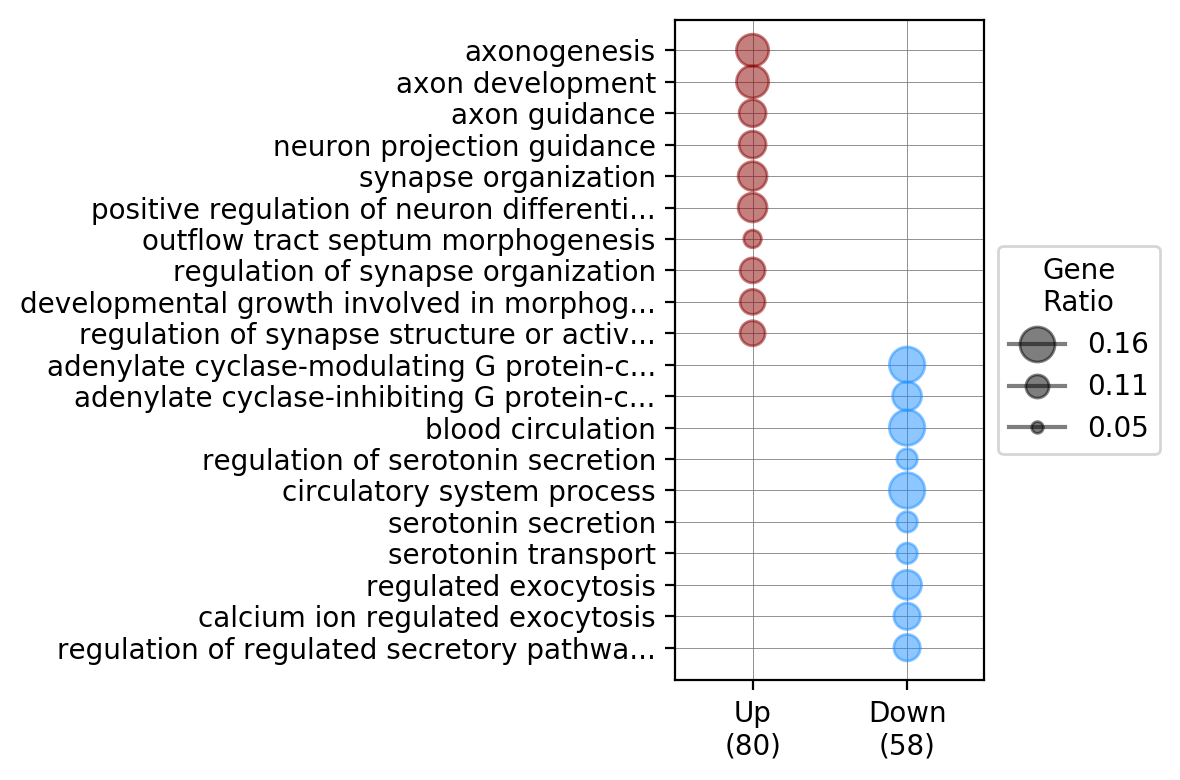

In [14]:
res_GO = pd.read_csv("INTERMEDIATE_FILES/Results_GO-Analysis_CompareClusters_2020-04-04.tsv",error_bad_lines=False)

n=10
up = res_GO.loc[res_GO["Cluster"]=="Up"][:n]
down = res_GO.loc[res_GO["Cluster"]=="Down"][:n]
size_up = [float(k.split("/")[0])/float(k.split("/")[1])*1000 for k in up["GeneRatio"]]
size_down = [float(k.split("/")[0])/float(k.split("/")[1])*1000 for k in down["GeneRatio"]]
ytik = list(up["Description"].values) + list(down["Description"].values)

fig,ax = plt.subplots(dpi=200)
plt.scatter([0]*n,range(n,n*2), s=size_up[::-1],color='darkred',alpha=0.5)
# plt.yticks(range(n,n*2),up["Description"].values[::-1])
plt.scatter([1]*n,range(n), s=size_down[::-1],color='dodgerblue',alpha=0.5)
ax.set_yticks(range(n*2))
ax.set_yticklabels([k[:40]+"..." if len(k)>40 else k for k in ytik[::-1]])
plt.xlim(-0.5,1.5)

plt.axvline(0,linewidth=0.3,color='grey',zorder=-3)
plt.axvline(1,linewidth=0.3,color='grey',zorder=-3)
for i in range(n*2):
    plt.axhline(i,linewidth=0.3,color='grey',zorder=-3)

legend_elements = []
for i,k in enumerate(sorted(size_up + size_down)[::-8]):
    print(k)
    legend_elements.append(Line2D([i], [0], marker='o', color='k', label='{}'.format(round(k/1000,2)),
                          markerfacecolor='k', markersize=k/13, alpha=0.5))
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5),title="Gene\nRatio")

plt.xticks(range(2),["Up\n(80)","Down\n(58)"])

plt.tight_layout()

plt.savefig("FIGURES/GO_TERM_CUSTOM_UP-DOWN.pdf")

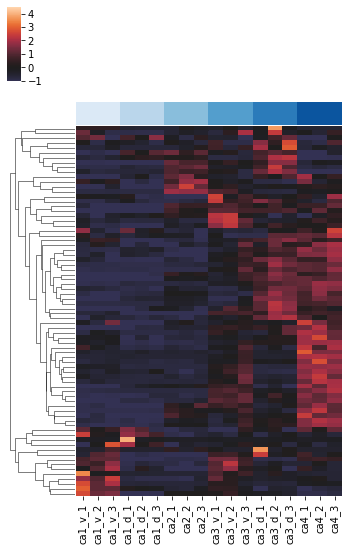

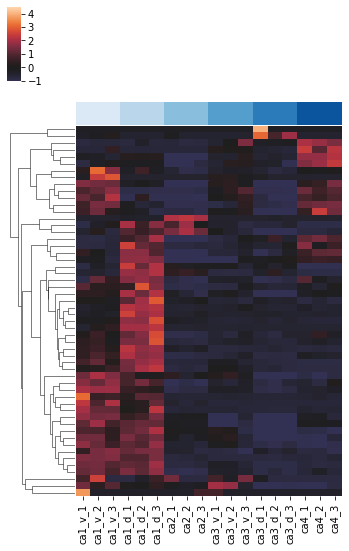

In [20]:
### hippoSeq

norm = pd.read_csv("INTERMEDIATE_FILES/GSE74985_mergedCount_TPM.tsv", sep="\t", index_col=0)

de = pd.read_csv("DESeq2/DE_genes_shrinked_apeglm.tsv", sep="\t")
de["geneID"] = de.index
de.index= [i.split(".")[0] for i in de.index]

diff_up = de.loc[(de.padj<0.05)&(de.log2FoldChange>0)].index
diff_down = de.loc[(de.padj<0.05)&(de.log2FoldChange<0)].index

norm_down = norm.loc[diff_down].dropna()
norm_down = norm_down[[i for i in list(norm_down) if i.startswith("ca")]]
norm_down = norm_down[['ca1_v_1','ca1_v_2','ca1_v_3',
                       'ca1_d_1','ca1_d_2','ca1_d_3',
                       'ca2_1','ca2_2','ca2_3',
                       'ca3_v_1','ca3_v_2','ca3_v_3',
                       'ca3_d_1','ca3_d_2','ca3_d_3',
                       'ca4_1','ca4_2','ca4_3']]

norm_up = norm.loc[diff_up].dropna()
norm_up = norm_up[[i for i in list(norm_up) if i.startswith("ca")]]
norm_up = norm_up[['ca1_v_1','ca1_v_2','ca1_v_3',
                       'ca1_d_1','ca1_d_2','ca1_d_3',
                       'ca2_1','ca2_2','ca2_3',
                       'ca3_v_1','ca3_v_2','ca3_v_3',
                       'ca3_d_1','ca3_d_2','ca3_d_3',
                       'ca4_1','ca4_2','ca4_3']]

cols=sns.color_palette("Blues",6).as_hex() * 3
cols = sorted(cols)[::-1]

p = sns.clustermap(norm_up, z_score=0, center=0, col_cluster=False, yticklabels=False, vmax=4.5, vmin=-1, col_colors=cols, figsize=(6,9))
p.savefig("FIGURES/DEUp_hipposeq_intersect.png",dpi=400)
p = sns.clustermap(norm_down, z_score=0, center=0, col_cluster=False, yticklabels=False, vmax=4.5, vmin=-1, col_colors=cols, figsize=(6,9))
p.savefig("FIGURES/DEDown_hipposeq_intersect.png",dpi=400)